# Student Name: Huynh Truong Tu
 Below is my assignment for week 4's "Binary classification of iris"


-----------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data set
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target, columns = ['Species'])
# rename columns
X.columns = [x.replace(' (cm)','') for x in X.columns]
print(X.columns)
print(iris.target_names)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
['setosa' 'versicolor' 'virginica']


## Problem 1 - Select Feature and Categories

In [3]:
#filter out setosa
setosa_idx = Y == 0
Y = Y.loc[~setosa_idx.values]
X = X.loc[~setosa_idx.values]
#filter out other attributes except sepai, petal length
X = X[['sepal length','petal length']]
data = pd.concat([X,Y],axis=1)
print(X.shape)
print(Y.shape)
print(data.shape)
print(data.head())

(100, 2)
(100, 1)
(100, 3)
    sepal length  petal length  Species
50           7.0           4.7        1
51           6.4           4.5        1
52           6.9           4.9        1
53           5.5           4.0        1
54           6.5           4.6        1


## Problem 2 - Problem Analysis

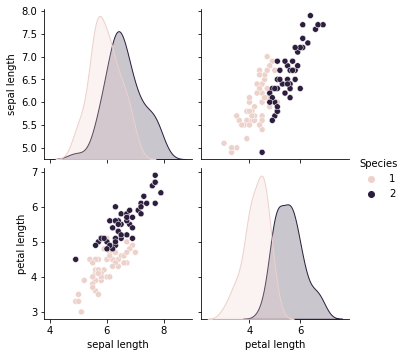

In [4]:
sns.pairplot(data = data,hue= 'Species')

<AxesSubplot:xlabel='Species', ylabel='petal length'>

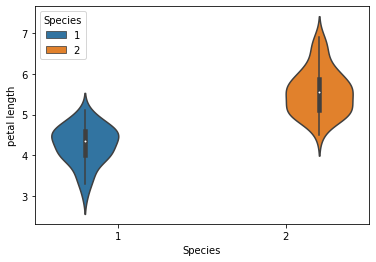

In [5]:
sns.violinplot(y = 'petal length', x = 'Species',data=data,hue = 'Species')

<AxesSubplot:xlabel='Species', ylabel='sepal length'>

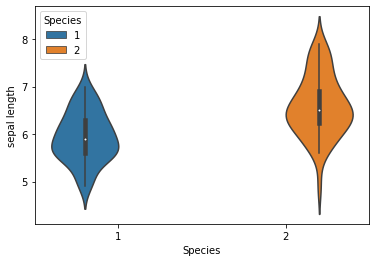

In [6]:
sns.violinplot(x = 'Species', y = 'sepal length',data=data, hue = 'Species')

<AxesSubplot:xlabel='Species', ylabel='petal length'>

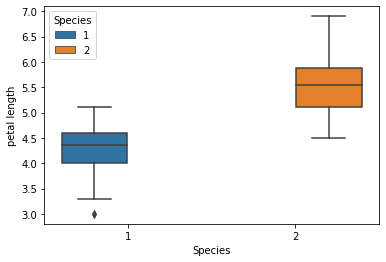

In [7]:
sns.boxplot(x = 'Species', y = 'petal length',data=data, hue = 'Species')

<AxesSubplot:xlabel='Species', ylabel='sepal length'>

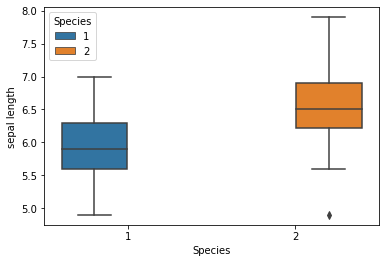

In [8]:
sns.boxplot(x = 'Species', y = 'sepal length',data=data, hue = 'Species')

## Problem 3 - Division of preprocessing/training data and verification data

In [9]:
from sklearn.model_selection import train_test_split
X = X.to_numpy()
Y = Y.to_numpy().reshape((Y.shape[0],))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
print(f'train size: x-{X_train.shape}, y-{Y_train.shape}')
print(f'test size: x-{X_test.shape}, y-{Y_test.shape}')

train size: x-(75, 2), y-(75,)
test size: x-(25, 2), y-(25,)


## Problem 4 - Pretreatment/Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y=Y_train)
X_test = scaler.fit_transform(X_test,y=Y_test)
print(f'Train shape x: {X_train.shape}, y: {Y_train.shape}')
print(f'Test shape x: {X_test.shape}, y: {Y_test.shape}')

Train shape x: (75, 2), y: (75,)
Test shape x: (25, 2), y: (25,)


## Problem 5 - Learning and estimation

In [11]:
from sklearn.neighbors import KNeighborsClassifier

def kmean_predict(n,train, test):
    x_train, y_train = train
    x_test, y_test = test
    classifier = KNeighborsClassifier(n)
    classifier.fit(x_train, y_train)
    return classifier.predict(x_test), classifier.score(x_test, y_test)


train = (X_train,Y_train)
test = (X_test,Y_test)
for i in [1,3,5]:
    _, score = kmean_predict(i,train,test)
    print(f'Accuracy of {i}nn classifier: {score}')

Accuracy of 1nn classifier: 0.84
Accuracy of 3nn classifier: 0.84
Accuracy of 5nn classifier: 0.84


## Problem 6 - Evaluation

In [12]:
from sklearn.metrics import confusion_matrix
for i in [1,3,5]:
    predicted, _ = kmean_predict(i,train,test)
    print(f'Confusion Matrix of {i}nn :')
    print(confusion_matrix(Y_test, predicted))

Confusion Matrix of 1nn :
[[ 8  0]
 [ 4 13]]
Confusion Matrix of 3nn :
[[ 8  0]
 [ 4 13]]
Confusion Matrix of 5nn :
[[ 8  0]
 [ 4 13]]


## Evaluation of Binary Classification (BC)
### To evaluate BC, we need to understand the basic components of our outcome:
* Positive (P): The real positive cases in data
* Negative (N): Real negative cases
* True Positive (TP): Correctly predicted positive cases
* True Negative (TN): Correctly predicted negative cases
* False Positive (FP): False Alarm (negative but predicted as positive)
* False Negative (FN): Missed cases (positive but not detected)

* P=TP+FN
* N=TN+FP

> Accuracy represents the number of correctly classified data instances over the total number of data instances.

 $$ ACC = \frac{Total Hits}{All Cases} = \frac{TP + TN}{TP + TN + FP + FN} $$

> Precision is defined as follows:

$$ PPV = \frac{TP}{TP + FP} $$

> Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).


> Recall is also known as sensitivity or true positive rate and is defined as follows:

$$ TPR = \frac{TP}{P} = \frac{TP}{TP + FN} $$

> Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don’t want).

> F1-score is a metric which takes into account both precision and recall and is defined as follows:

$$ F = 2*\frac{Precision * Recall}{Precision + Recall} $$

> F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

## Problem 7 - Visualization

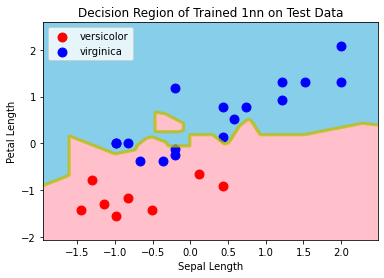

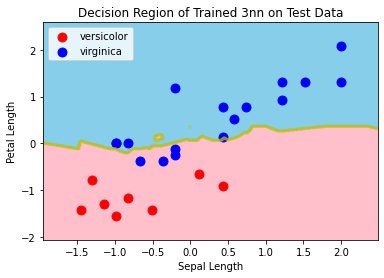

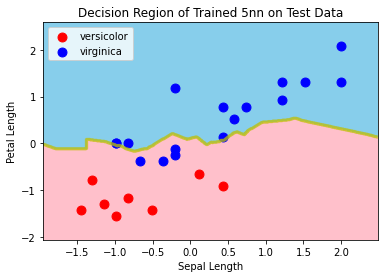

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],class_count = 2):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['green', 'red', 'blue'] if class_count == 3 else ['red', 'blue']
    contourf_color = ['lightgreen','pink', 'skyblue'] if class_count == 3 else ['pink', 'skyblue']
    n_class = class_count
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

for i in [1,3,5]:
    model = KNeighborsClassifier(i).fit(X_train,Y_train)
    decision_region(X_test,Y_test, model,title = f'Decision Region of Trained {i}nn on Test Data',
    xlabel = 'Sepal Length', ylabel = 'Petal Length')

## Problem 8 - Learning By Other Methods

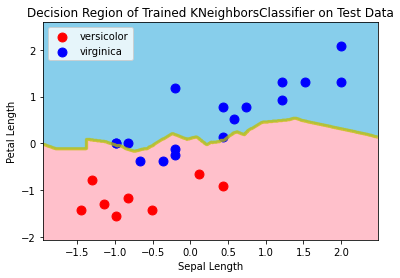

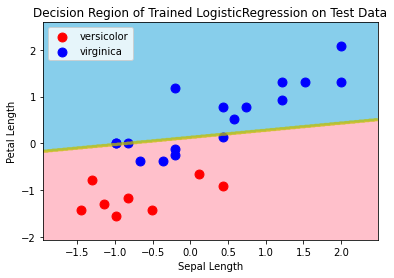

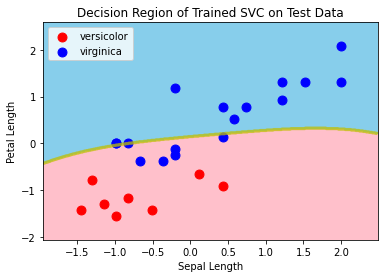

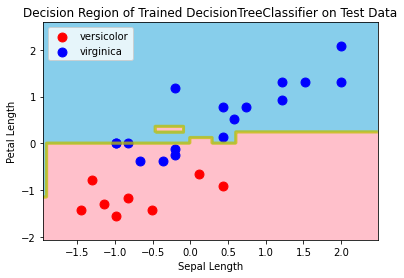

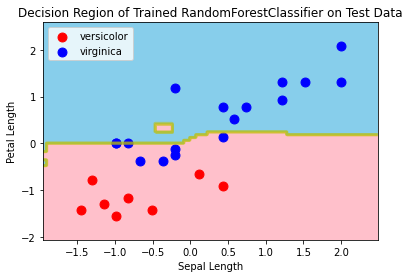

In [14]:
import sklearn.metrics as metrics
def build_n_test_classifier(classifier, train, test):
    x_train,y_train = train
    x_test, y_test = test
    classifier.fit(x_train, y_train)

    decision_region(x_test,y_test, classifier,title = f'Decision Region of Trained {classifier.__class__.__name__} on Test Data',
xlabel = 'Sepal Length', ylabel = 'Petal Length')

    predictions = classifier.predict(x_test)
    result = dict()
    # result['Predictions'] = predictions
    result['Accuracy'] = [metrics.accuracy_score(y_test,predictions)]
    result['F-Score'] = [metrics.f1_score(y_test,predictions)]
    result['Precision'] = [metrics.precision_score(y_test,predictions)]
    result['Recall'] = [metrics.recall_score(y_test,predictions)]
    # result['Classifier'] = classifier
    return result

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_list = [KNeighborsClassifier(), LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
summary = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier(cls,train,test),orient='columns')
    result.index = [cls.__class__.__name__]
    summary = summary.append(result)

In [15]:
summary

,Accuracy,F-Score,Precision,Recall
KNeighborsClassifier,0.84,0.800000,0.666667,1.0
LogisticRegression,0.80,0.761905,0.615385,1.0
SVC,0.80,0.761905,0.615385,1.0
DecisionTreeClassifier,0.72,0.695652,0.533333,1.0
RandomForestClassifier,0.68,0.666667,0.500000,1.0


## Problem 9 - Comparison with and without standardization


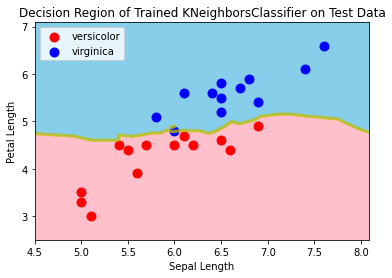

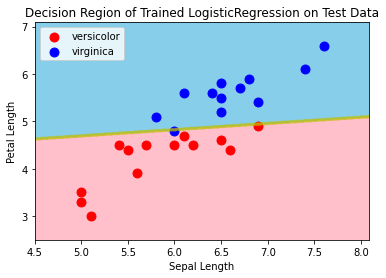

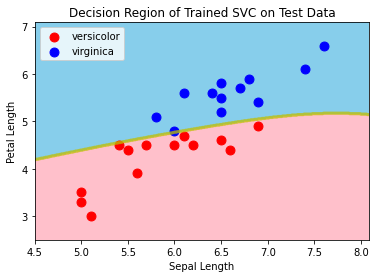

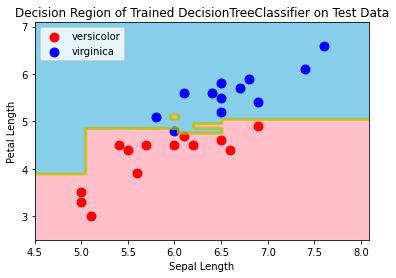

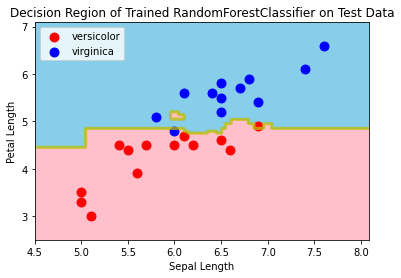

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
train = (X_train, Y_train)
test= (X_test, Y_test)

summary_nons = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier(cls,train,test),orient='columns')
    result.index = [cls.__class__.__name__]
    summary_nons = summary_nons.append(result)

In [17]:
summary_nons

,Accuracy,F-Score,Precision,Recall
KNeighborsClassifier,1.00,1.000000,1.000000,1.000000
LogisticRegression,0.96,0.962963,0.928571,1.000000
SVC,1.00,1.000000,1.000000,1.000000
DecisionTreeClassifier,0.96,0.962963,0.928571,1.000000
RandomForestClassifier,0.92,0.923077,0.923077,0.923077


## Side by side of Summary results of normalized and non-normalized Data

In [18]:
print('Standadized: ')
print(summary)
print('---------------------------------------------------------')
print('Non-Standadized: ')
print(summary_nons)

Standadized: 
                        Accuracy   F-Score  Precision  Recall
KNeighborsClassifier        0.84  0.800000   0.666667     1.0
LogisticRegression          0.80  0.761905   0.615385     1.0
SVC                         0.80  0.761905   0.615385     1.0
DecisionTreeClassifier      0.72  0.695652   0.533333     1.0
RandomForestClassifier      0.68  0.666667   0.500000     1.0
---------------------------------------------------------
Non-Standadized: 
                        Accuracy   F-Score  Precision    Recall
KNeighborsClassifier        1.00  1.000000   1.000000  1.000000
LogisticRegression          0.96  0.962963   0.928571  1.000000
SVC                         1.00  1.000000   1.000000  1.000000
DecisionTreeClassifier      0.96  0.962963   0.928571  1.000000
RandomForestClassifier      0.92  0.923077   0.923077  0.923077


## Problem 10 - All Objective Variables

In [19]:
def build_n_test_classifier_multiclass(classifier, train, test, class_count = 3, class_names = ['setosa','versicolor', 'virginica']):
    x_train,y_train = train
    x_test, y_test = test
    classifier.fit(x_train, y_train)

    decision_region(x_test,y_test, classifier,title = f'Decision Region of Trained {classifier.__class__.__name__} on Test Data',
    xlabel = 'Sepal Length', ylabel = 'Petal Length',target_names = class_names,class_count = class_count)

    predictions = classifier.predict(x_test)
    result = dict()
    # result['Predictions'] = predictions
    result['Accuracy'] = [metrics.accuracy_score(y_test,predictions)]
    result['F-Score Micro Avg'] = [metrics.f1_score(y_test,predictions,average = 'micro')]
    result['F-Score Macro Avg'] = [metrics.f1_score(y_test,predictions,average = 'macro')]
    result['Precision Micro Avg'] = [metrics.precision_score(y_test,predictions,average = 'micro')]
    result['Precision Macro Avg'] = [metrics.precision_score(y_test,predictions,average = 'macro')]
    result['Recall Micro Avg' ] = [metrics.recall_score(y_test,predictions,average = 'micro')]
    result['Recall Macro Avg' ] = [metrics.recall_score(y_test,predictions,average = 'macro')]
    # result['Classifier'] = classifier
    return result

   sepal length  petal length
0           5.1           1.4
1           4.9           1.4
2           4.7           1.3
3           4.6           1.5
4           5.0           1.4
   Species
0        0
1        0
2        0
3        0
4        0
shapex: (150, 2), shapey: (150,)


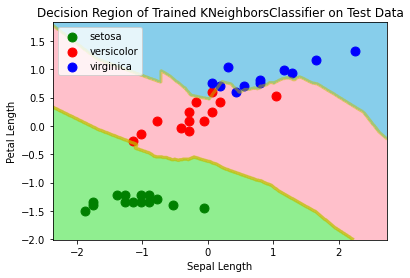

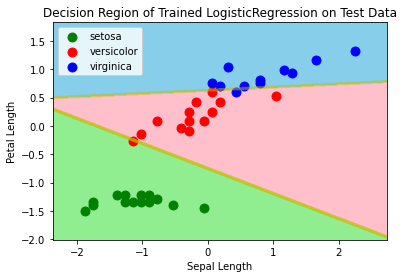

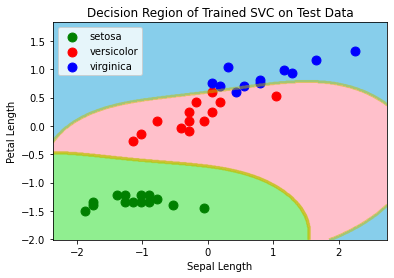

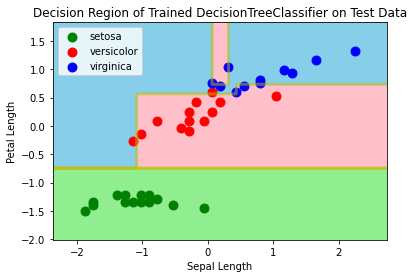

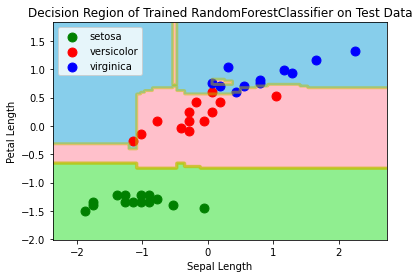

In [20]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target, columns = ['Species'])
# rename columns
X.columns = [x.replace(' (cm)','') for x in X.columns]
#Remove
X = X[['sepal length','petal length']]
print(X.head())
print(Y.head())
#to numpy and standardize
X = X.to_numpy()
Y = Y.to_numpy().reshape((Y.shape[0],))
print(f'shapex: {X.shape}, shapey: {Y.shape}')
X = scaler.fit_transform(X,y=Y)

# split
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.25)
train = (x_train,y_train)
test = (x_test,y_test)
summary_full = pd.DataFrame()
for cls in classifier_list:
    result = pd.DataFrame.from_dict(build_n_test_classifier_multiclass(cls,train,test) ,orient='columns')
    result.index = [cls.__class__.__name__]
    summary_full = summary_full.append(result)

In [21]:
summary_full

,Accuracy,F-Score Micro Avg,F-Score Macro Avg,Precision Micro Avg,Precision Macro Avg,Recall Micro Avg,Recall Macro Avg
KNeighborsClassifier,0.921053,0.921053,0.915344,0.921053,0.919048,0.921053,0.913753
LogisticRegression,0.947368,0.947368,0.946992,0.947368,0.952137,0.947368,0.944056
SVC,0.973684,0.973684,0.971781,0.973684,0.976190,0.973684,0.969697
DecisionTreeClassifier,0.894737,0.894737,0.888112,0.894737,0.888112,0.894737,0.888112
RandomForestClassifier,0.894737,0.894737,0.888112,0.894737,0.888112,0.894737,0.888112


### Conclusion: Problem 10
From the summary, we can see that every classifier did a well except for Kmean which is a bit behind.

------------------------------------------------------------------------

This is the end of my assignment, thank you for reading!